<a href="https://colab.research.google.com/github/ZnFn/ML-mini-projects/blob/main/Challenge_5_Stroke_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Challenge of the Week: Full DL Solution**

---
###**Case Study:** Stroke Prediction

**Objective:** The goal of this challenge is to walk you through a case study where you can apply the deep learning concepts that you learned about during the week. By the end of this challenge, you would have developed a solution that predicts if a person will have a stroke or not.


**Dataset Explanation:** We will be using the stroke dataset. Its features are:


* **id:** unique identifier
* **gender:** "Male", "Female" or "Other"
* **age:** age of the patient
* **hypertension:** 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
* **heart_disease:** 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
* **ever_married:** "No" or "Yes"
* **work_type:** "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
* **Residence_type:** "Rural" or "Urban"
* **avg_glucose_level:** average glucose level in blood
* **bmi:** body mass index
* **smoking_status:** "formerly smoked", "never smoked", "smokes" or "Unknown"*
* **stroke:** 1 if the patient had a stroke or 0 if not

#Importing Libraries

We start by importing the libraries: numpy and pandas

In [ ]:
#Test Your Zaka
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Loading the Dataset

We load the dataset from a csv file, and see its first rows

In [ ]:
#Test Your Zaka
path = '/content/drive/MyDrive/healthcare-dataset-stroke-data.csv'
df = pd.read_csv(path)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


#Exploratory Data Analysis

Now we start the exploratory data analysis.

###Shape of the data

First, you need to know the shape of our data (How many examples and features do we have)

In [ ]:
#Test Your Zaka
rows = df.shape[0]
cols = df.shape[1]
print(f'we have {rows} rows and {cols} columns')

we have 5110 rows and 12 columns


###Types of different Columns

See the type of each of your features and see if you have any nulls

In [ ]:
#Test Your Zaka
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


###Dealing with categorical variables

Now we will walk through the categorical variables that we have to see the categories and the counts of each of them.

'smoking_status'

In [ ]:
#Test Your Zaka
df.smoking_status.value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

'Residence_type'

In [ ]:
#Test Your Zaka
df.Residence_type.value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

'work_type'

In [ ]:
#Test Your Zaka
df.work_type.value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

'ever_married'

In [ ]:
#Test Your Zaka
df.ever_married.value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

'hypertension'

In [ ]:
#Test Your Zaka
df.hypertension.value_counts()

0    4612
1     498
Name: hypertension, dtype: int64

'heart_disease'

In [ ]:
#Test Your Zaka
df.heart_disease.value_counts()

0    4834
1     276
Name: heart_disease, dtype: int64

'stroke'

In [ ]:
#Test Your Zaka
df.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

#Preprocessing

###Dealing with Nulls

####Encoding Categorical Features

Here you will encode those categorical variables to be able to use them to train our DL model.

In [ ]:
#Test Your Zaka
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['gender']= encoder.fit_transform(df['gender'])
df['ever_married'] = encoder.fit_transform(df['ever_married'])
df['work_type'] = encoder.fit_transform(df['work_type'])
df['Residence_type'] = encoder.fit_transform(df['Residence_type'])
df['smoking_status'] = encoder.fit_transform(df['smoking_status'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   int64  
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   int64  
 6   work_type          5110 non-null   int64  
 7   Residence_type     5110 non-null   int64  
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   int64  
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 479.2 KB


Fill the nulls with the mean value, and make sure you have no nulls anymore

In [ ]:
#Test Your Zaka
mean = df['bmi'].mean()
df['bmi'].fillna(value=mean, inplace=True)
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

###Normalizing Features

Now you normalize the input data by dividing with the max value of each column.

In [ ]:
#Test Your Zaka
max= df.max()
df = df.divide(max)
df.describe()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.500656,0.207143,0.527154,0.097456,0.054012,0.656164,0.541928,0.508023,0.390622,0.296037,0.458969,0.048728
std,0.290125,0.246522,0.275764,0.296607,0.226063,0.475034,0.272573,0.499985,0.166643,0.078873,0.357178,0.215320
min,0.000919,0.000000,0.000976,0.000000,0.000000,0.000000,0.000000,0.000000,0.202841,0.105533,0.000000,0.000000
25%,0.243231,0.000000,0.304878,0.000000,0.000000,0.000000,0.500000,0.000000,0.284261,0.243852,0.000000,0.000000
50%,0.506334,0.000000,0.548780,0.000000,0.000000,1.000000,0.500000,1.000000,0.338136,0.290984,0.666667,0.000000
75%,0.749685,0.500000,0.743902,0.000000,0.000000,1.000000,0.750000,1.000000,0.419850,0.336066,0.666667,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


###Removing Unnecessary Features

From the features that we have, remove one that is irrelevant for our predictions

In [ ]:
#Test Your Zaka
df.drop(['id'],axis=1, inplace=True)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.5,0.817073,0.0,1.0,1.0,0.50,1.0,0.841577,0.375000,0.333333,1.0
1,0.0,0.743902,0.0,0.0,1.0,0.75,0.0,0.744130,0.296037,0.666667,1.0
2,0.5,0.975610,0.0,1.0,1.0,0.50,0.0,0.389784,0.332992,0.666667,1.0
3,0.0,0.597561,0.0,0.0,1.0,0.50,1.0,0.630124,0.352459,1.000000,1.0
4,0.0,0.963415,1.0,0.0,1.0,0.75,0.0,0.640760,0.245902,0.666667,1.0


#Building the DL Model

Now it's time to build the actual model, and observe a summary of it.<br>
The sizes of the **hidden** layers that you should use are: [32,16,8,4,2].
The activation for each of those hidden layers is 'relu'
<br>
Print the summary of your model.

In [ ]:
#Test Your Zaka
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
def create_model():
  model = Sequential()
  model.add(Dense(32, activation='relu', input_dim=10))
  model.add(Dense(16, activation='relu'))
  model.add(Dense(8, activation='relu'))
  model.add(Dense(4, activation='relu'))
  model.add(Dense(2, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  return model

###Compiling the model

Now we compile the model. Here we want to measure the accuracy as well as the precision and recall to know better about the performance of our model.
We will use 'adam' as optimizer.

In [ ]:
#Test Your Zaka
model = create_model()
model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics=['accuracy', 'Precision', 'Recall'])
model.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_192 (Dense)           (None, 32)                352       
                                                                 
 dense_193 (Dense)           (None, 16)                528       
                                                                 
 dense_194 (Dense)           (None, 8)                 136       
                                                                 
 dense_195 (Dense)           (None, 4)                 36        
                                                                 
 dense_196 (Dense)           (None, 2)                 10        
                                                                 
 dense_197 (Dense)           (None, 1)                 3         
                                                                 
Total params: 1,065
Trainable params: 1,065
Non-train

###Fitting the data

we split our dataset between training and testing, and we fit the model on training data (70%), and validate on the testing data (30%). The training happens for 15 epochs.

In [ ]:
#Test Your Zaka
from sklearn.model_selection import train_test_split
X = df.iloc[:,0:-1]
Y = df.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=42)
model.fit(x_train, y_train,validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
112/112 [==============================] - 2s 7ms/step - loss: 0.4168 - accuracy: 0.9530 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.2515 - val_accuracy: 0.9419 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/15
112/112 [==============================] - 0s 4ms/step - loss: 0.2004 - accuracy: 0.9553 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.2304 - val_accuracy: 0.9419 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/15
112/112 [==============================] - 0s 4ms/step - loss: 0.1864 - accuracy: 0.9553 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.2148 - val_accuracy: 0.9419 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/15
112/112 [==============================] - 1s 5ms/step - loss: 0.1768 - accuracy: 0.9553 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.2042 - val_accuracy: 0.9419 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/15
112/112 [====================

What can you deduce from the results you obtained?

**[Share your Zaka here]**

**Since our precision is 0 this means that our model is not being able to correctly predict positive cases**

**Since our recall is 0 this means the nodel is not being able to predict positive cases**

#Improving DL Models

###Checking For Data Imbalance

Plot a histogram that shows the distribution of 'stroke' column

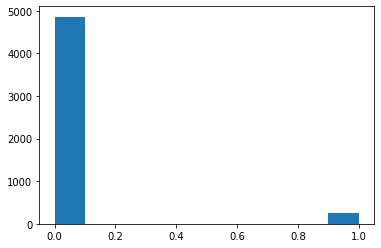

In [ ]:
#Test Your Zaka
import matplotlib.pyplot as plt
plt.hist(Y)
plt.show()

We have a huge imbalance in the data, this is why we fix it with oversamppling and undersampling.

This time, you will learn to oversample using the SMOTE() function instead of random oversampling, and this is because SMOTE will generate new data based on the data that we have, so we avoid overfitting.

After doing that, plot the new histogram showing the proportions of people having stroke or not

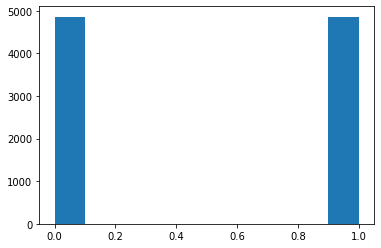

In [ ]:
#Test Your Zaka
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
x_new, y_new = sm.fit_resample(X,Y)
plt.hist(y_new)
plt.show()

Now we will fit our same model on the new balanced data that we have, with the same conditions we had before (train/test splits, epochs, etc)

In [ ]:
#Test Your Zaka
x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.3, random_state=42)
model.fit(x_train, y_train,validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
213/213 [==============================] - 1s 7ms/step - loss: 0.3953 - accuracy: 0.8100 - precision: 0.7755 - recall: 0.8724 - val_loss: 0.3919 - val_accuracy: 0.8214 - val_precision: 0.7844 - val_recall: 0.8870
Epoch 2/15
213/213 [==============================] - 1s 7ms/step - loss: 0.3921 - accuracy: 0.8119 - precision: 0.7789 - recall: 0.8709 - val_loss: 0.3950 - val_accuracy: 0.8183 - val_precision: 0.7624 - val_recall: 0.9253
Epoch 3/15
213/213 [==============================] - 1s 5ms/step - loss: 0.3908 - accuracy: 0.8113 - precision: 0.7769 - recall: 0.8733 - val_loss: 0.3895 - val_accuracy: 0.8252 - val_precision: 0.7893 - val_recall: 0.8877
Epoch 4/15
213/213 [==============================] - 1s 5ms/step - loss: 0.3877 - accuracy: 0.8145 - precision: 0.7783 - recall: 0.8794 - val_loss: 0.3874 - val_accuracy: 0.8231 - val_precision: 0.7843 - val_recall: 0.8918
Epoch 5/15
213/213 [==============================] - 2s 7ms/step - loss: 0.3867 - accuracy: 0.8150 - pr

Comment the performance you obtained

**[Share your Zaka here]**

**It's true that our accuracy decreased but out precision and recall improved**

**Now our model can predict positive values correctly and much better**

**The val recall, the val accuracy and val precision are approximetly the same as that on training set**

###Model Design

Now you will introduce batch normalization after each layer of your network

In [ ]:
#Test Your Zaka
from tensorflow.keras.layers import BatchNormalization
def batch_model():
    model = Sequential()
    model.add(Dense(32, activation='relu', input_dim=10))
    model.add(BatchNormalization())
    model.add(Dense(16, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(8, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(4, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(2, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer = 'adam',  metrics=['accuracy', 'Precision', 'Recall'])

    return model

Let's train the model with the same conditions as before

In [ ]:
#Test Your Zaka
modelb = batch_model()
modelb.fit(x_train, y_train,validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
213/213 [==============================] - 4s 7ms/step - loss: 0.5948 - accuracy: 0.6980 - precision: 0.6795 - recall: 0.7492 - val_loss: 0.5761 - val_accuracy: 0.7230 - val_precision: 0.6501 - val_recall: 0.9671
Epoch 2/15
213/213 [==============================] - 1s 5ms/step - loss: 0.4949 - accuracy: 0.7691 - precision: 0.7282 - recall: 0.8586 - val_loss: 0.4803 - val_accuracy: 0.7785 - val_precision: 0.7200 - val_recall: 0.9123
Epoch 3/15
213/213 [==============================] - 1s 5ms/step - loss: 0.4693 - accuracy: 0.7813 - precision: 0.7430 - recall: 0.8600 - val_loss: 0.4577 - val_accuracy: 0.7881 - val_precision: 0.7306 - val_recall: 0.9137
Epoch 4/15
213/213 [==============================] - 1s 5ms/step - loss: 0.4562 - accuracy: 0.7885 - precision: 0.7461 - recall: 0.8744 - val_loss: 0.4328 - val_accuracy: 0.8012 - val_precision: 0.7699 - val_recall: 0.8596
Epoch 5/15
213/213 [==============================] - 1s 6ms/step - loss: 0.4462 - accuracy: 0.7888 - pr

Comment the performance of your model

**[Share your Zaka here]**
**The recall decreased and its now the same on training and testing set**
**The accuracy of the test set is now better than that on training, same for precision**


###Hyperparameter Tuning

Now we will tune some hyperparameters of our model.

We start by wrapping our model inside a kerasClassifier to be able to use it in Scikit Learn

In [ ]:
#Test Your Zaka
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
model1 = KerasClassifier(build_fn = batch_model)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  This is separate from the ipykernel package so we can avoid doing imports until


We will tune the batch size (it can be 50 or 100) and the number of epochs (it can be 50 or 100).
We will use a 3 folds cross validation

In [ ]:
#Test Your Zaka
from sklearn.model_selection import GridSearchCV
batches = [50,100]
epochs = [50,100]
params ={'batch_size':batches,'epochs': epochs}
tune = GridSearchCV(model1, param_grid= params, cv=3)


Find the best parameters according to the Grid Search you have done, and the accuracy for the best model.

In [ ]:
#Test Your Zaka
best_p=tune.fit(x_train, y_train,verbose=0)
best_p.best_params_

23/23 [==============================] - 1s 2ms/step - loss: 0.3095 - accuracy: 0.8726 - precision: 0.8403 - recall: 0.9232


{'batch_size': 50, 'epochs': 100}

Fit the model on the best hyperparameters we obtained.

In [ ]:
#Test Your Zaka
modelb.fit(x_train, y_train,validation_data=(x_test, y_test), epochs=100, batch_size=50)

Epoch 1/100
137/137 [==============================] - 1s 11ms/step - loss: 0.3817 - accuracy: 0.8284 - precision: 0.7901 - recall: 0.8941 - val_loss: 0.3764 - val_accuracy: 0.8306 - val_precision: 0.8088 - val_recall: 0.8664
Epoch 2/100
137/137 [==============================] - 1s 10ms/step - loss: 0.3797 - accuracy: 0.8276 - precision: 0.7930 - recall: 0.8865 - val_loss: 0.3606 - val_accuracy: 0.8378 - val_precision: 0.7978 - val_recall: 0.9055
Epoch 3/100
137/137 [==============================] - 2s 11ms/step - loss: 0.3713 - accuracy: 0.8347 - precision: 0.7954 - recall: 0.9009 - val_loss: 0.3706 - val_accuracy: 0.8334 - val_precision: 0.8130 - val_recall: 0.8664
Epoch 4/100
137/137 [==============================] - 1s 8ms/step - loss: 0.3687 - accuracy: 0.8312 - precision: 0.7968 - recall: 0.8889 - val_loss: 0.3616 - val_accuracy: 0.8450 - val_precision: 0.7920 - val_recall: 0.9363
Epoch 5/100
137/137 [==============================] - 1s 8ms/step - loss: 0.3739 - accuracy: 0.8

Comment the performance of your model

**[Share Your Zaka here]**

**The loss is the smaller compared to the previous model**

**The training accuracy increased by 7% than the previous model and the validation accuracy increased by 6%**

**The training precision increased by 7% than the previous model and the validation precision increased by 6% as well**

**The training recall and the validation recall increased by 4% than the previous model** 

**Overall the model performance is much better than before, and if we tune other hyperparamters like the number of hidden layers and the optimizer for example we could even achieve a better perfomance**